In [1]:
%matplotlib inline
import PAA_LISA
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from fractions import Fraction
import math
import datetime
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
import warnings
warnings.filterwarnings('ignore', 'The iteration is not making good progress')
#warnings.filterwarnings("error")
import scipy.optimize

year2sec=32536000
day2sec=year2sec/365.25
c=300000000

['positions_timestep_days_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_10.txt', 'readable.py', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
['McKenzie_orbit_timestep_seconds_scale_1000.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000.txt']
['Folkner_orbit_timestep_seconds_scale_10.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1.txt', 'Folkner_orbit_timestep_seconds_scale_1.txt', 'NGO_1M_10deg_synthlisa_timestep_days_scale_1000.txt']
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Dir_extr:new_1_synthlisa_armcalc
Getting scale by filename:
1000.0

Getting timestep by filename:
days


Importing Orbit
400 datapoints
Done in 0.474195

Obtaining proper LISA object
Done in 0.000281
/home/ester/git/synthlisa/orbits/new/Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000.txt
Offset:

Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-PAA.png saved in:
/home/ester/git/synthlisa/calculations/Notebooks//figures/20181109-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-diffPAA.png saved in:
/home/ester/git/synthlisa/calculations/Notebooks//figures/20181109-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-PAA_all.png saved in:
/home/ester/git/synthlisa/calculations/Notebooks//figures/20181109-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-Breathing_angles.png saved in:
/home/ester/git/synthlisa/calculations/Notebooks//figures/20181109-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-send_receive_angle.png saved in:
/home/ester/git/synthlisa/calculations/Notebooks//figures/20181109-new_1_synthlisa_armcalc/
Figure Hallion_2pt5G_orbits_pos_uniquedays_timestep_days_scale_1000-Wobbli

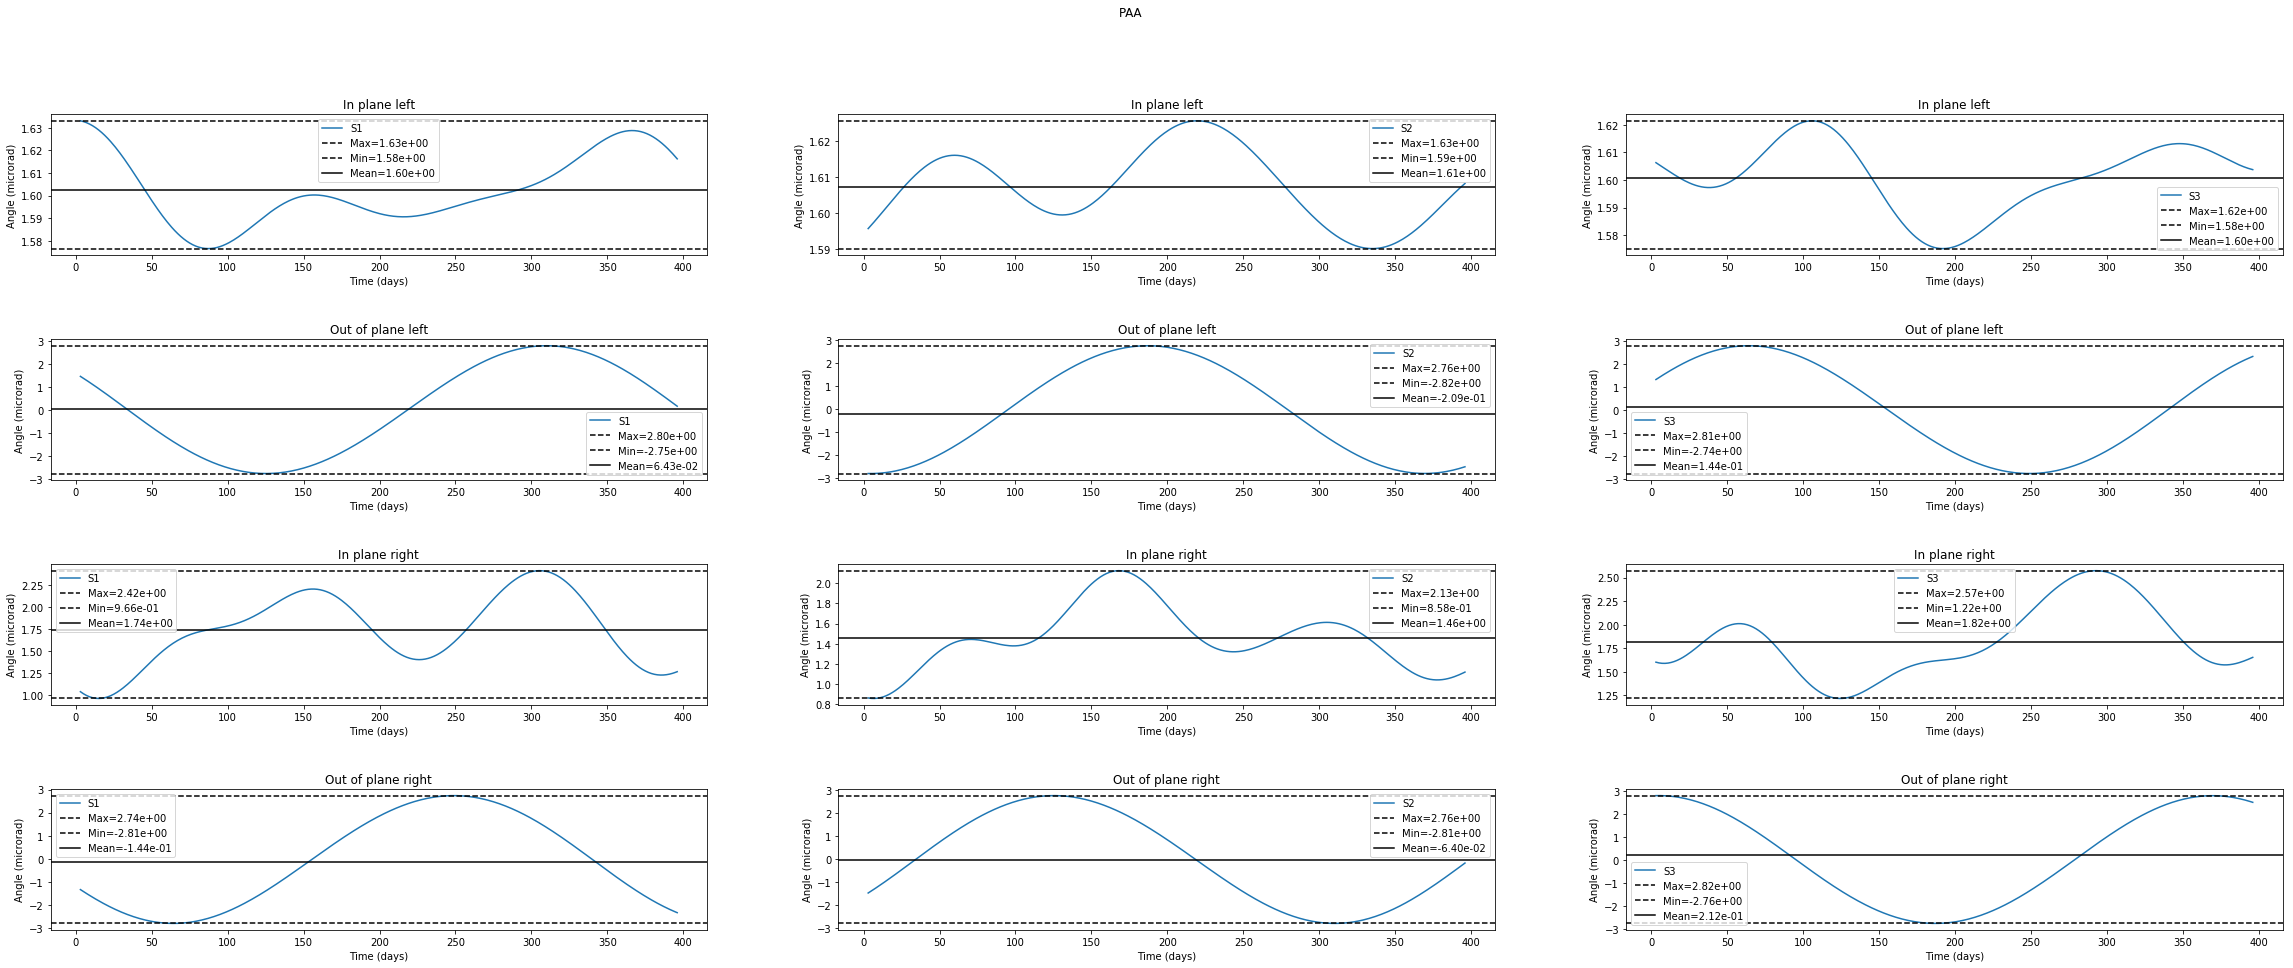

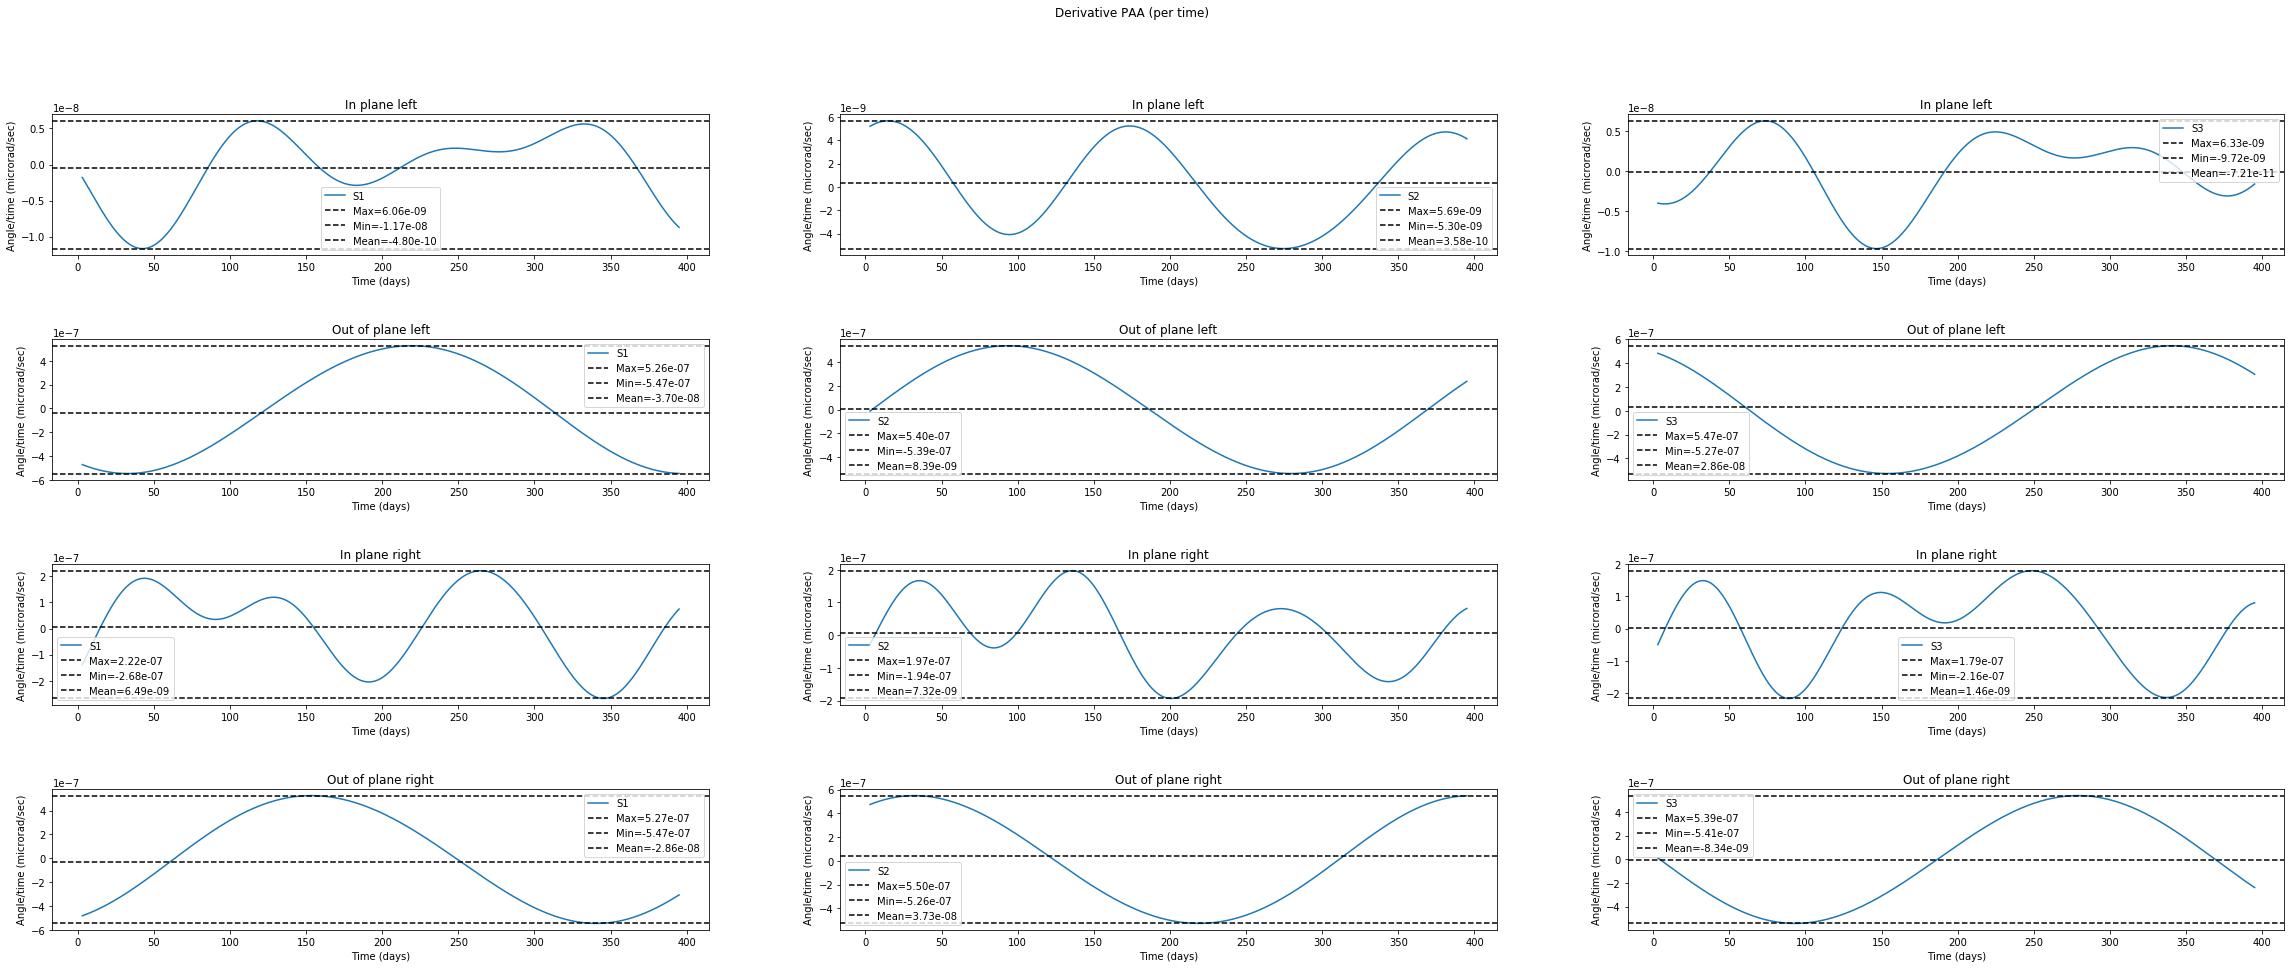

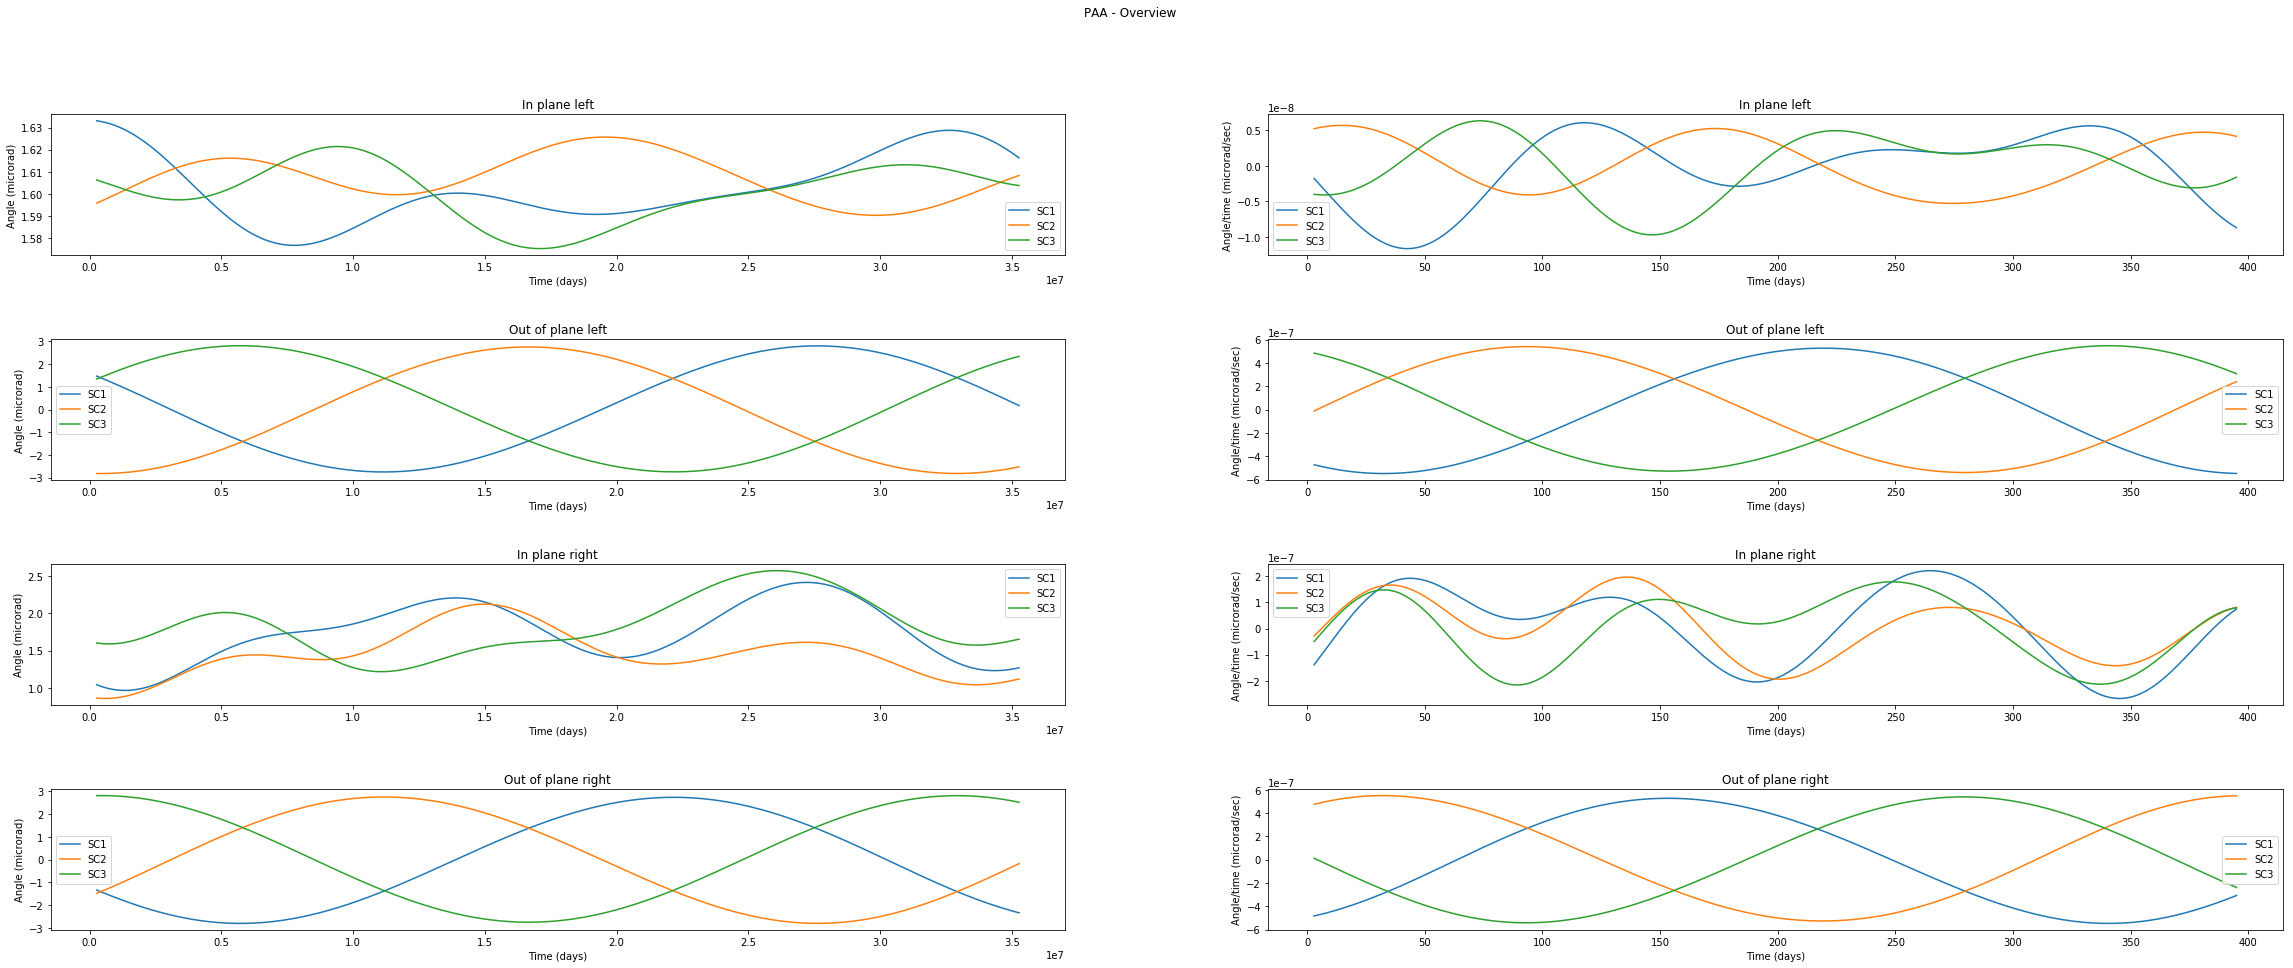

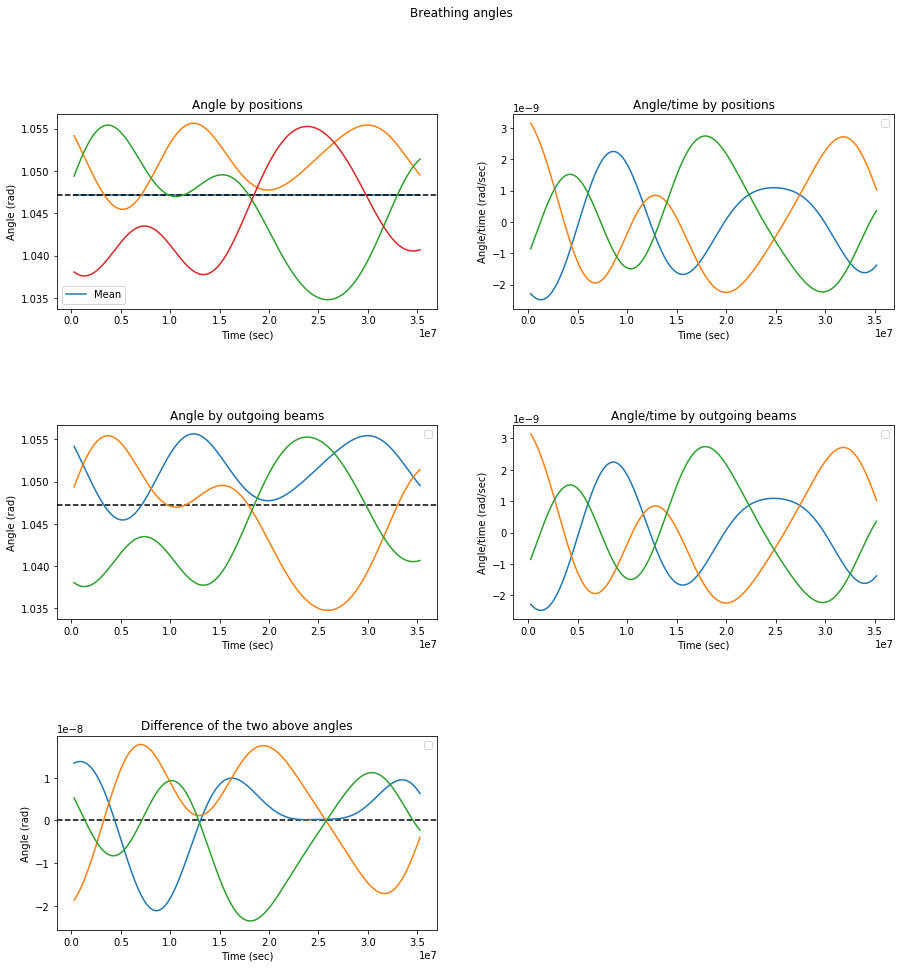

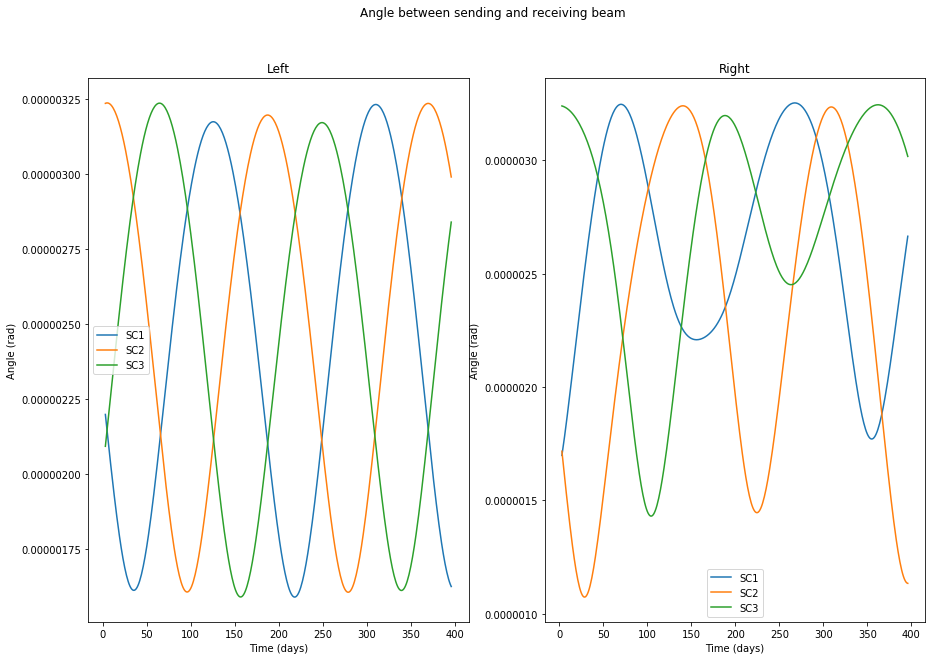

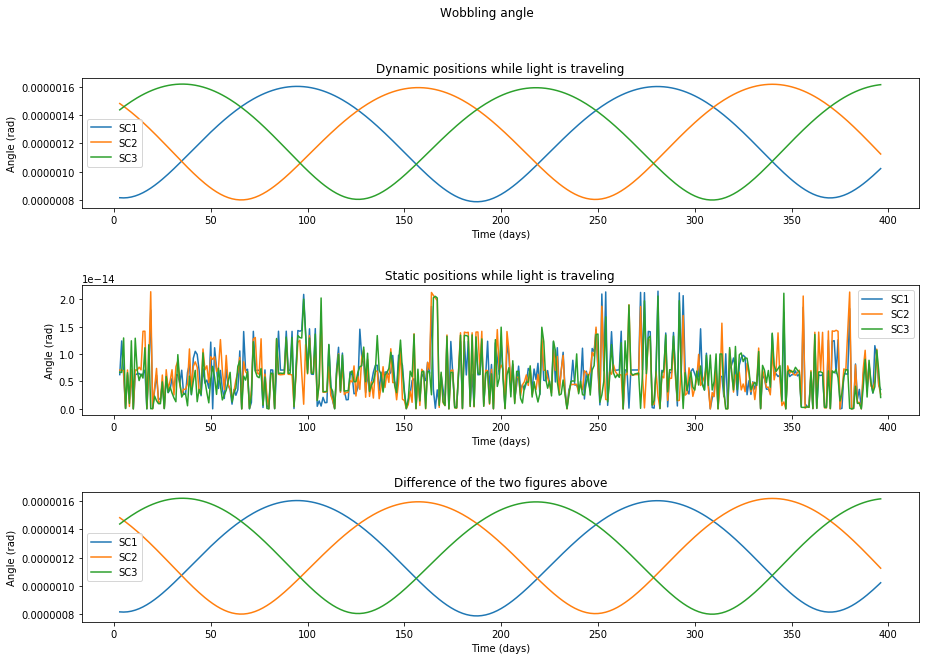

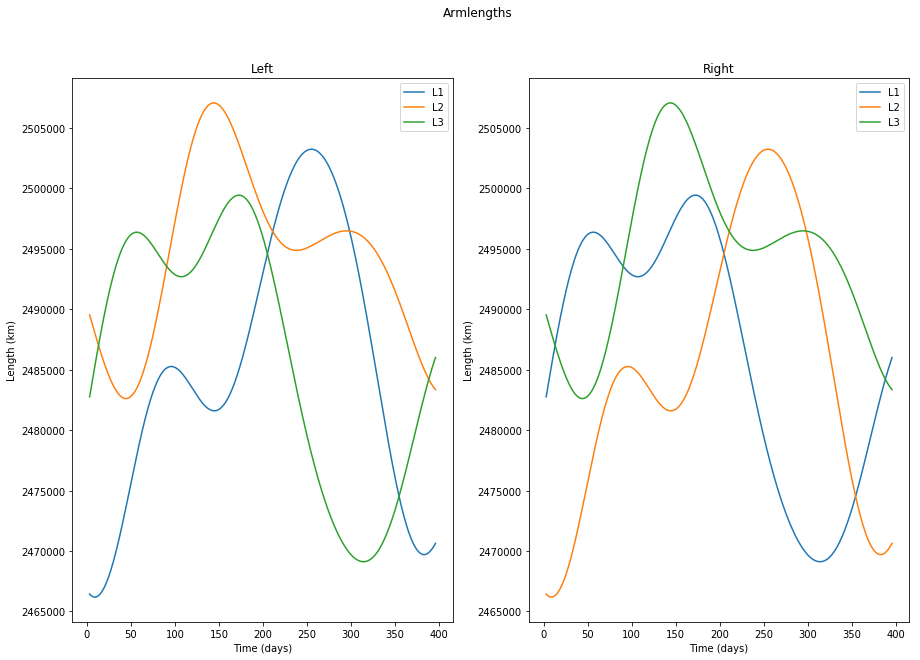

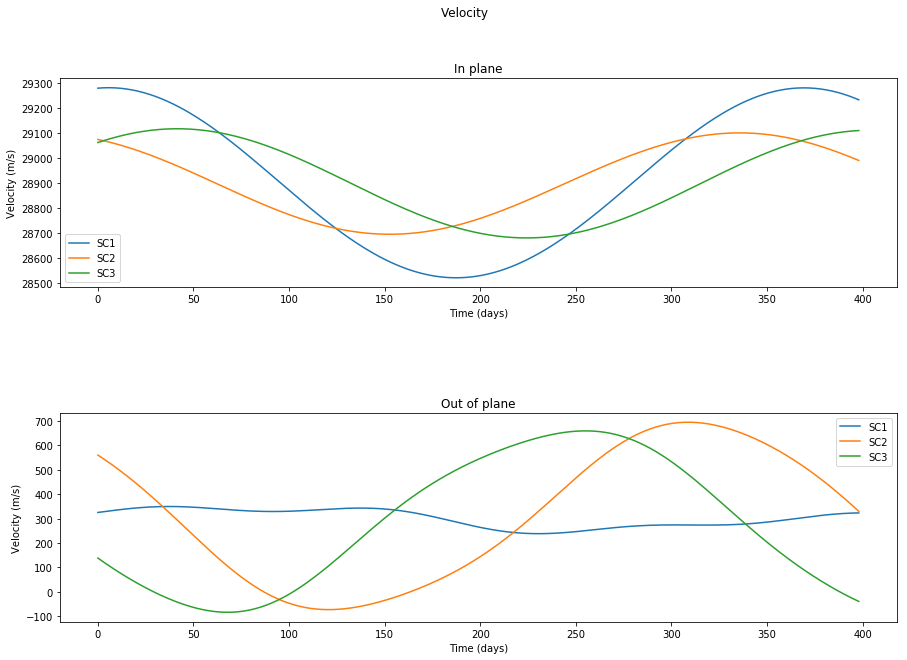

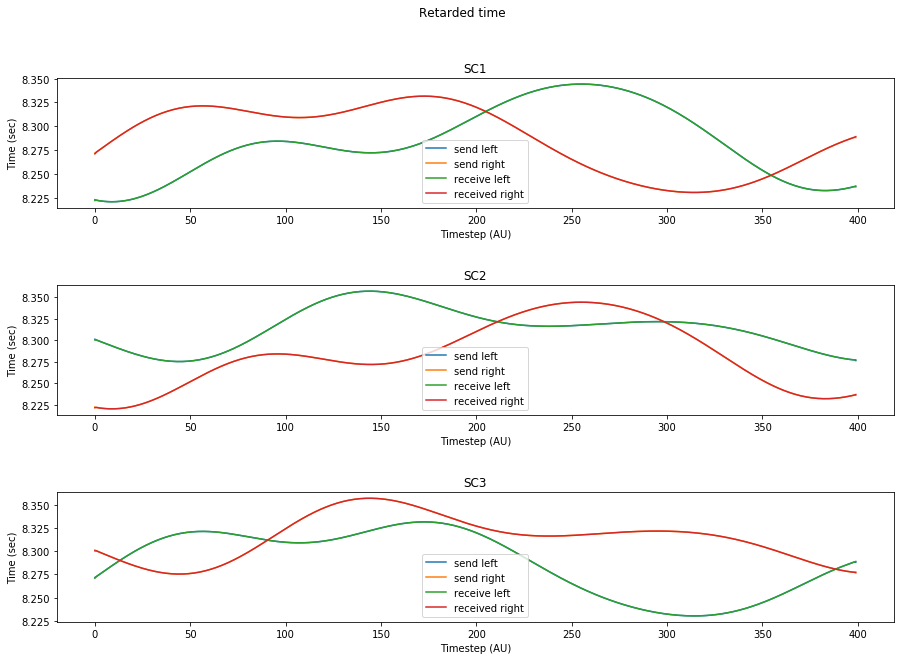

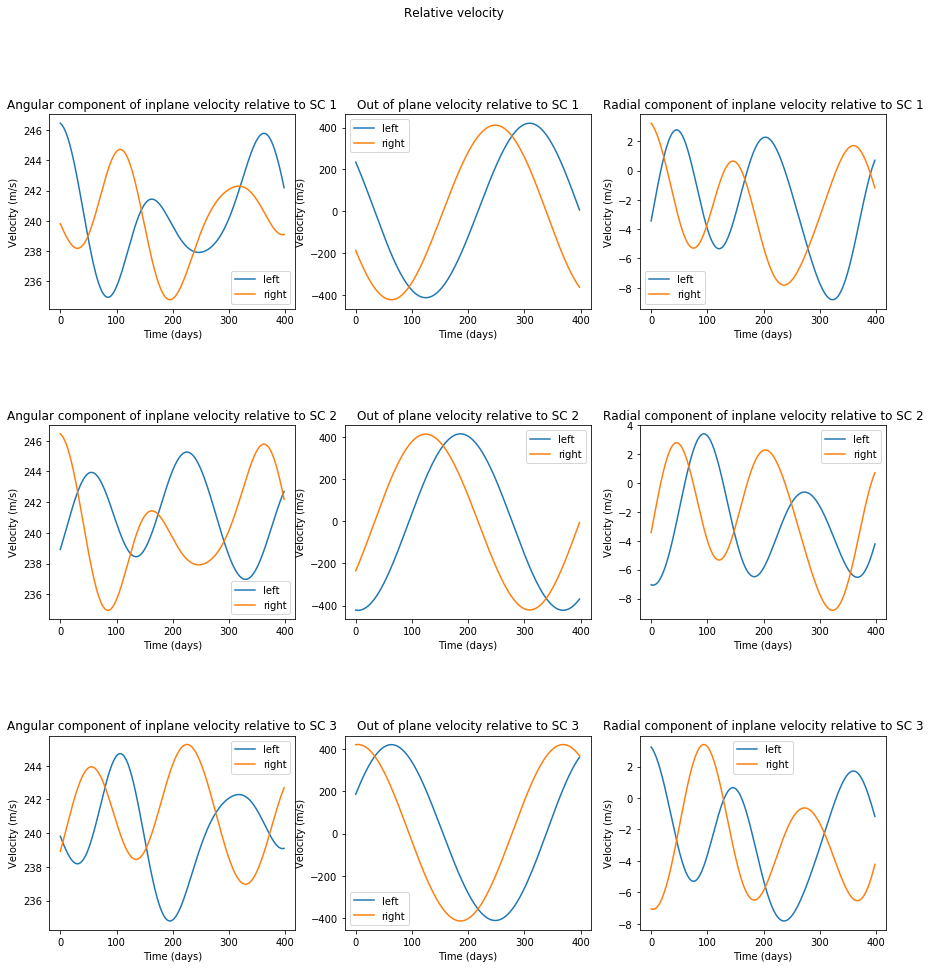

In [2]:
input_param = {
        'plot_on':True, #If plots will be made
        'dir_savefig': os.getcwd(), # The directory where the figures will be saved. If False, it will be in the current working directory
        'noise_check':False,
        'home':'/home/ester/git/synthlisa/', # Home directory
        'directory_imp': False,
        'num_back': 0,
        'dir_orbits': '/home/ester/git/synthlisa/orbits/', # Folder with orbit files
        'length_calc':400, # Length of number of imported datapoints of orbit files. 'all' is also possible
        'dir_extr': 'new_1_synthlisa_armcalc', # This will be added to the folder name of the figures
        'timeunit':'Default', # The timeunit of the plots (['minutes'],['days']['years'])
        'LISA_opt':True, # If a LISA object from syntheticLISA will be used for further calculations (not sure if it works properly if this False)
        'arm_influence': True, # Set True to consider the travel time of the photons when calculating the nominal armlengths
        'tstep':False,
        'delay':True, #'Not ahead' or False
        'method':'fsolve', # Method used to solve the equation for the photon traveling time
        'valorfunc':'Function', #
        'select':'Hallion' # Select which orbit files will be imported ('all' is all)
        }

data_all,PAA_res = PAA_LISA.runfile.do_run(input_param)

In [3]:
for k in range(0,len(PAA_res.keys())/2):
    #data = PAA_res[str(k+1)]
    data = data_all[str(k+1)]

In [4]:
# Parameters:
labda =1064*(10**-9) # m
eta_opt = 0.23 # ...look up
eta_pd = 0.68 # A/W
P_L = 1 # W ...verufy with new LISA technical speifications
D = 0.40 # Diameter [m]
#h = 6.62607004*(10**-34) # Js
#c=300000000
#h = 1.98644568*(10**-25) # J/m
#c = 1
h = 1.0/(6.241506*(10**18))



In [5]:
# Parameters for point PAAM
PAA_out_lim = 0.5*0.000001
PAA_out_marge = 0.1*0.000001


In [6]:
[PAA_in_l,PAA_out_l,PAA_in_r,PAA_out_r] = data.PAA_ret
[v_l,v_r,u_l,u_r] = data.beam

In [7]:
def aim(values,lim,step,offset=0):
    PAA_set_list=[]
    PAA_control_list=[]
    PAA_step_list=[]
    values_original=[]
    for i in range(0,len(values)):
        PAA_set_vec=[]
        PAA_control_vec=[]

        PAA_set = 0
        values_calc = values[i][offset:-data.offset]
        for j in range(0,len(values_calc)):
            PAA_val = values_calc[j]+PAA_set

            while PAA_val>lim:
                PAA_set = PAA_set - step
                PAA_val = PAA_val - step

            while PAA_val<-lim:
                PAA_set = PAA_set + step
                PAA_val = PAA_val + step
            PAA_set_vec.append(PAA_set)
            PAA_control_vec.append(PAA_val)
        PAA_set_list.append(np.array(PAA_set_vec))
        PAA_control_list.append(np.array(PAA_control_vec))
        values_original.append(values_calc)
        
    return [[values_original,PAA_control_list,PAA_set_list],[lim,step,offset]]

titles=['l_in','l_out','r_in','r_out']
PAA_all={}
for k in range(0,len(data.PAA_ret)):
    title = titles[k]
    [[PAA_part_original,PAA_part_control,PAA_part_set],[lim,step,offset]] = aim(data.PAA_ret[k],0.5*0.000001,0.1*0.000001,data.offset)
    
    PAA_all[title]=PAA_part_original
    
    
    

In [8]:
def i_slr(i):
    i_self = i
    i_left = (i+1)%3
    i_right = (i+2)%3

    i_ret = [i_self,i_left,i_right]
    for j in range(0,len(i_ret)):
        if i_ret[j]==0:
            i_ret[j]=3

    return i_ret

def delay(data,l_array,t,para='X',delay_on=True):
    t_del = 0
    if delay_on==True:
        for k in range(0,len(l_array)):
            j = -1-k
            i_r = (abs(l_array[j])+1)%3
            try:
                if l_array[j]>0:
                    t_del = t_del - data.L_rl[i_r-1](t - t_del)
                elif l_array[j]<0:
                    t_del = t_del - data.L_rr[i_r-1](t - t_del)
            except:
                pass

    return t_del

In [9]:
def tdi_val(i,tdi,data,t,side='l',generation=0,para='X',print_on=False,delay_on=True):
    if para=='X':
        shift = 0
    elif para=='Y':
        shift = 1
    elif para == 'Z':
        shift = 2
        
    if side == 'l':
        [r,s,l] = i_slr(i)
    elif side =='r':
        [r,l,s] = i_slr(i)
        l=-l
    
    
    id={}
    for kk in range(-3,4):
        if kk!=0:
            sign = np.sign(kk)
            abs_kk = abs(kk) - 1
            
            id[str(kk)] = (((abs_kk+shift)%3)+1)*sign
    if print_on==True:
        print(id)
    
    X = []
    
    try:
        t_del = delay(data,[id['3'],id['2'],id['-1']],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['1'],id['-3'],id['2'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['2'],id['-1']],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['1'],id['2,i'],id['3'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(tdi.y(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,t - t_del))

        t_del = delay(data,[id['-2'],id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['1'],id['2'],id['3'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['1'],id['-3'],id['2'],0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-tdi.y(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,t - t_del))

        t_del = delay(data,[id['2'],id['-2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-3'],id['3'],id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1v'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['2'],id['-2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,0,t - t_del))

        t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-0.5*tdi.z(id['3'],id['-2'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
        t_del = delay(data,[id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(0.5*tdi.z(id['2'],id['3'],id['1'],0,0,0,0,0,0,0,0,t - t_del))
    except:
        pass
    
    
    return sum(X)

In [10]:
def PSD(f_list,SD_list):
    return interp1d(f_list,SD_list,bounds_error=False,fill_value=0)

def PowerLaw(SD_val,f0,exp=1):
    return lambda f: (SD_val)*((f/f0)**exp)

def add_func_help(func_list,f):

    func_ret = func_list[0]

    if len(func_list)>1:
        for i in range(1,len(func_list)):
            func_ret = func_ret(f)+func_list[i](f)

    return func_ret

def add_func(func_list):

    return lambda f: add_func_help(func_list,f)


def Noise(f0,f_max,N,psd,unit):
    M = N/2.0 +1
    df = (f_max-f0)/M

    f_lin = np.linspace(f0,f_max,M)
    psd_lin = psd(f_lin)

    ASD=[]
    phi = []
    Z_neg = []
    Z_pos = []
    for f in f_lin:
        if unit =='phasepercycle':
            ASD.append((((psd(f)**2)*2*np.pi)*2)**0.5)
        else:
            ASD.append((psd(f)*2)**0.5)
        phi.append(random.random()*2*np.pi)
        Z_pos.append(ASD[-1]*np.exp(1j*phi[-1]))
        Z_neg.append(ASD[-1]*np.exp(1j*random.random()*2*np.pi))


    Z1 = [0]*(N/2)
    Z_tot=[0]
    for i in range(0,len(Z_pos)):
        Z_tot.append(Z_pos[i])
    for i in range(0,len(Z_neg)):
        Z_tot.append(Z_neg[i])

    IFFT = np.fft.ifft(Z_tot)
    Dt = 1/(2.0*f_max)
    t0 = 0
    t_max = (N-1)*Dt
    t_IFFT = np.linspace(t0,t_max,len(IFFT))

    return [t_IFFT,IFFT]

def Noise_time(f0,f_max,N,psd,t_stop,unit='freq',t=False):
    t_max = 0
    count=0
    while t_max< t_stop:
        #print(count)
        [t_IFFT,IFFT] = Noise(f0,f_max,N,psd,unit=unit)
        if count!=0:
            t_tot = np.concatenate((t_tot,t_IFFT+t_tot[-1]))
            noise_tot = np.concatenate((noise_tot,IFFT))
        elif count==0:
            t_tot = t_IFFT
            noise_tot = IFFT
        t_max = t_tot[-1]
        #print(t_max)
        count=count+1

    t_ret = []
    noise_ret = []
    for i in range(0,len(t_tot)):
        if t_tot[i]<=t_stop:
            t_ret.append(t_tot[i])
            noise_ret.append(noise_tot[i])
    t_ret = np.array(t_ret)
    noise_ret = np.array(noise_ret)

    func_noise = interp1d(t_ret,noise_ret,bounds_error=False)
    #if func_noise!=False:
    #    func_noise = func_noise(t)
    return [t_ret,noise_ret],func_noise

In [11]:
def solve_valueerror(func,x):
    check = True
    try:
        return func(x)
    except ValueError:
        check = False
        

In [12]:
# Lasernoise
freq_lasernoise_PSD = lambda f: 400 #...source
C_func = {}
C_func_star = {}
t_ret = {}
for j in range(0,6):
    i=j%3
    f0=1e-6
    f_max = 1e-3
    t_stop = data.t_plot[i][-1]
    [t_ret_calc,noise_ret],func_noise = Noise_time(f0,f_max,4096,freq_lasernoise_PSD,t_stop)
    nu_0 = c/labda
    
    #C_i = lambda time: func_noise(time)/nu_0
    if j<3:
        C_func[str(i+1)] = interp1d(t_ret_calc,np.real(noise_ret/nu_0),bounds_error=False)
    else:
        C_func_star[str(i+1)] = interp1d(t_ret_calc,np.real(noise_ret/nu_0),bounds_error=False)
    t_ret[str(i+1)] = t_ret_calc

/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [13]:
def y_laser(data,C,C_star,t):
    y={}
    for s in range(1,4):
        for r in range(1,4):
            check=True
            if (s - r)%3 ==1:
                sign = 'pos'
                t_del = data.L_rl_func_tot[r-1](t)
    
            elif (s - r)%3 ==2:
                sign = 'neg'
                t_del = data.L_rr_func_tot[r-1](t)
            
            elif s==r:
                check=False
            if check==True:
                if sign=='pos':
                    y[str(s)+str(r)] = C_star[str(s)](t-t_del) - C[str(r)](t)
                elif sign=='neg':
                    y[str(s)+str(r)] = C_star[str(s)](t-t_del) - C[str(r)](t)
    return y

def y_laser_calc(data,C,C_star,t_all):
    y_ret={}
    t_ret={}
    for t in t_all:
        try:
            y = y_laser(data,C,C_star,t)
            #print(y)
            for keys in y.keys():
                if keys not in y_ret.keys():
                    y_ret[keys] = []
                    t_ret[keys]=[]
                y_ret[keys].append(y[keys])
                t_ret[keys].append(t)
                print(y[keys])
        except (ValueError):
            print(t)
            pass
        #except (TypeError):
        #    print(t)
        #    pass
    
    y_ret_interp = {}
    for keys in y_ret:
        y_ret_interp[keys] = interp1d(np.array(t_ret[keys]),np.array(y_ret[keys]),bounds_error=False)
        
    return y_ret_interp

def z_laser(data,C,C_star,t):
    z={}
    for s in range(1,4):
        for r in range(1,4):
            check=True
            
            if (s - r)%3 ==1:
                sign = 'pos'
    
            elif (s - r)%3 ==2:
                sign = 'neg'
            
            elif s==r:
                check=False
            if check==True:
                if sign=='pos':
                    z[str(s)+str(r)] = C_star[str(r)](t) - C[str(r)](t)
                elif sign=='neg':
                    z[str(s)+str(r)] = C[str(r)](t) - C_star[str(r)](t)
                    
    return z

def z_laser_calc(data,C,C_star,t_all):
    z_ret={}
    t_ret={}
    for t in t_all:
        try:
            z = z_laser(data,C,C_star,t)
            #print(y)
            for keys in z.keys():
                if keys not in z_ret.keys():
                    z_ret[keys] = []
                    t_ret[keys]=[]
                z_ret[keys].append(z[keys])
                t_ret[keys].append(t)
                #print(z[keys])
        except (ValueError):
            #print(t)
            pass
        #except (TypeError):
        #    print(t)
        #    pass
    
    z_ret_interp = {}
    for keys in z_ret:
        z_ret_interp[keys] = interp1d(np.array(t_ret[keys]),np.array(z_ret[keys]),bounds_error=False)
        
    return z_ret_interp





In [14]:
y_lasernoise = y_laser_calc(data,C_func,C_func_star,data.t_plot[0])

nan
nan
nan
nan
nan
nan
-1.5620454200652426e-16
1.7302550688552626e-16
4.590608750873512e-16
-3.263716752830301e-16
2.247672622893414e-16
6.808554688726772e-16
-4.0055330104229555e-16
-5.99989318748514e-16
7.029368240227608e-16
-4.2764887148736594e-17
-3.072949495522377e-16
6.379277045710112e-16
1.6647642366903342e-15
3.2115403545947693e-16
1.1817766691852414e-15
7.861034610908101e-16
-3.503873207204621e-16
1.3889710498018973e-15
2.9391684581200694e-15
2.208496041799992e-15
4.889603941847549e-16
1.1154260377393909e-15
1.4982949699482388e-16
2.541386673752407e-16
1.1156976187810806e-16
-1.1001504796784872e-16
1.4651050741351617e-15
-1.592189724816846e-16
-2.9276568642825906e-16
1.5530366701817424e-15
-1.9196516814767544e-15
-1.871236585947608e-15
-1.324699614254184e-15
-1.535788888170003e-15
-5.718496601684683e-16
-4.0987625429808774e-16
-5.539765664674631e-16
3.0807221373112367e-15
2.6671885541168932e-15
-7.093963316601317e-17
3.20330445053177e-15
2.3065488368729544e-15
-8.855721736616

-2.2627016740822617e-15
5.27410188589662e-16
-8.434324642547053e-16
-2.1326593778913448e-15
1.4110032544376572e-15
-9.002568724041723e-17
1.0432477132719025e-15
7.286373762648486e-17
1.6692689185140216e-16
3.0809205515308257e-16
-1.0301453923592716e-15
-2.0108139890893163e-16
-2.3311220050447867e-16
-1.8589103200704828e-16
-1.624982672798507e-17
-1.0777469831582448e-17
-1.9552114750406575e-16
-2.4801115534202213e-16
1.5711283948542653e-15
1.607003082000472e-15
-9.876381640463774e-16
1.096406709852831e-15
-2.265923456952136e-16
-2.3467329297304364e-15
-5.325379589831766e-16
-1.955300013998542e-15
2.2336901658448126e-15
8.633499852947229e-16
-3.704028801183778e-16
2.4228127521761394e-15
2.1193126358507897e-15
-1.1960171911708e-15
5.083581415040081e-16
1.9268107512278546e-15
-9.728189891187253e-16
9.242231009058534e-16
1.063306528667975e-15
4.461060966990541e-16
-1.2418441470818368e-15
-2.589524468726305e-16
8.109618228432333e-16
4.455925719143882e-16
-2.057570478651542e-15
-2.90337399062

-1.4938802423715307e-15
-1.7817590512787027e-15
1.2439528239665172e-15
4.558630836356319e-16
-2.038529008229171e-15
-9.627338122018674e-16
-2.137212521900166e-15
-1.130570547019243e-15
8.909069493711478e-16
-1.074467384462544e-15
-6.608281059033005e-16
2.978382976513853e-16
-2.6255788940997316e-15
-1.981067177889664e-15
-7.360807892032047e-16
-4.450262535790824e-16
-2.6912530438809376e-16
-1.2047144025332467e-15
7.772041364609259e-16
9.526193907635375e-16
1.7683583867512368e-16
1.1557270418094963e-15
1.300588916752389e-15
1.4627039941945166e-16
8.142701420251291e-16
2.5569116755604427e-15
-9.070751747413872e-16
-1.6626622787842755e-16
1.0409321764942735e-15
-1.4424803636477284e-15
-5.076229947167005e-16
-3.8988409598913907e-16
1.2752450395084963e-15
-1.0542544588868014e-15
-1.7458773950389744e-15
4.658774604387716e-16
-5.961948848600823e-16
-8.774053116840493e-16
-2.4236269739654177e-15
-3.668198536017985e-16
-1.976835346629203e-15
-3.752501146706611e-15
-4.755497861843512e-16
-3.02201

-7.130421126736521e-16
1.8469848139050976e-15
1.3823635112013685e-15
-1.145409456711379e-15
-1.1137637507063055e-15
-2.416496897559209e-15
-6.241025843033313e-16
-1.2035776548112104e-15
-3.0278259416778907e-15
-1.4949485450354453e-15
-1.7086690113642495e-15
1.179892386310041e-15
-5.862590258675503e-16
-1.999649844018107e-15
-1.977962655999479e-17
2.09002576195958e-15
-5.650576216748144e-16
-1.6850274592569882e-15
1.5345595559227668e-15
-6.867799679752791e-16
-1.2518735563091497e-15
1.1302442979862067e-15
7.548770446735009e-16
-3.569648066487969e-16
-1.1633511854061697e-15
2.0409413040229442e-15
3.221892799009382e-15
-1.9632534101584526e-16
9.003334840392262e-17
1.3320500614694682e-15
5.246237478682483e-16
1.4395743145795283e-15
1.96075868627163e-15
5.232589309917982e-16
1.679159933778464e-16
1.226293246475274e-15
5.236006338063626e-16
-7.47266004798974e-16
3.10933744564059e-16
-2.881301346232694e-16
-9.857124887378913e-16
-7.467571678957475e-16
1.567830493067404e-15
4.700005862415673e-

9.294699116585561e-16
8.383463203274621e-16
-6.15839873967693e-16
-7.124856983932859e-16
-5.275336550467558e-16
-3.825047043440469e-17
2.2433392747048126e-15
1.4102791936278122e-15
1.6832757478702108e-15
2.0271326509490208e-15
1.6728539943341829e-15
1.4732530608337842e-15
-5.745848025530628e-16
7.86089055925694e-16
-6.479069582912431e-16
-1.8089044870250614e-15
-8.58839731784316e-16
1.822860156247216e-15
1.056886894351503e-15
5.333134038079804e-16
1.6929576937642644e-15
-4.653777660065861e-16
1.1070467603911751e-16
2.0538006544179645e-15
8.234725393459948e-16
-8.651748866888221e-16
3.807453218610268e-16
1.2610694770295375e-16
-3.7048218518669464e-16
-5.129576329953802e-16
-2.712138514106303e-15
-3.223307116634936e-15
1.4470804294377498e-16
7.979729757497725e-16
-1.1238197551995708e-15
-8.097442262896462e-16
-5.700602989708512e-16
-8.291968505232955e-16
7.890659977552178e-16
7.340577064054916e-16
nan
nan
nan
nan
nan
nan


In [15]:
z_lasernoise = z_laser_calc(data,C_func,C_func_star,data.t_plot[0])

In [16]:
# Shot noise
P_v_l=[]
P_v_l0=[]
P_v_r=[]
P_v_r0=[]
phi_l_sn_q = []
phi_r_sn_q = []

for i in range(0,len(data.t_plot)):
    i_self = i+1
    t = data.t_plot[i]
    v_l_func = data.v_l_func_tot[i]
    v_r_func = data.v_r_func_tot[i]
    u_l_func = data.u_l_func_tot[i]
    u_r_func = data.u_r_func_tot[i]
    P_v_l_vec=[]
    P_v_l0_vec=[]
    P_v_r_vec=[]
    P_v_r0_vec=[]
    phi_l_sn_q_vec = []
    phi_r_sn_q_vec = []
    
    for j in range(0,len(t)):
        v_l = v_l_func(t[i])
        L = np.linalg.norm(v_l)
        ang_v_l_in = data.PAA_beam_next_sc[0][i][j] - np.radians(30)
        ang_v_l_out = data.PAA_beam_next_sc[1][i][j] - np.radians(30)
        P_rec0 = ((np.pi**2)*(D**4)*(eta_opt*P_L))/(16*(labda**2)*(L**2))
        P_rec = P_rec0*np.cos(ang_v_l_in)*np.cos(ang_v_l_out)
        P_v_l_vec.append(P_rec)
        P_v_l0_vec.append(P_rec0)

        phi_l_sn_q_vec.append((h/(eta_pd*(P_rec/4.0)))**0.5) # Shot noise per quadrant (upper limit)
            
        v_r = v_r_func(t[i])
        L = np.linalg.norm(v_r)
        ang_v_r_in = data.PAA_beam_next_sc[2][i][j] - np.radians(30)
        ang_v_r_out = data.PAA_beam_next_sc[3][i][j] - np.radians(30)
        P_rec0 = ((np.pi**2)*(D**4)*(eta_opt*P_L))/(16*(labda**2)*(L**2))
        P_rec = P_rec0*np.cos(ang_v_r_in)*np.cos(ang_v_r_out)
        P_v_r_vec.append(P_rec)
        P_v_r0_vec.append(P_rec0)

        phi_r_sn_q_vec.append((h/(eta_pd*(P_rec/4.0)))**0.5) # Shot noise per quadrant (upper limit)
    
    P_v_l.append(np.array(P_v_l_vec))
    P_v_l0.append(np.array(P_v_l0_vec))
    P_v_r.append(np.array(P_v_r_vec))
    P_v_r0.append(np.array(P_v_r0_vec))
    phi_l_sn_q.append(np.array(phi_l_sn_q_vec))
    phi_r_sn_q.append(np.array(phi_r_sn_q_vec))
    
P_r_l_func = {}
P_r_r_func={}
P_r_l_max = {}
P_r_r_max = {}

for i in range(0,3):
    P_r_l_func[str(i+1)] = interp1d(t,P_v_l0[i],bounds_error=False)
    P_r_r_func[str(i+1)] = interp1d(t,P_v_r0[i],bounds_error=False)
    P_r_l_max[str(i+1)] = max(P_v_l0[i])
    P_r_r_max[str(i+1)] = max(P_v_r0[i])

In [17]:
# Shot noise
def y_shot(data,P_r_l_max,P_r_r_max,t):
    y={}
    # ... Using the maximum value of P_r_r(/P_r_l) to cancel time dependance
    for s in range(1,4):
        for r in range(1,4):
            check=True
            if (s - r)%3 ==1:
                P_r = P_r_l_max[str(r)]
    
            elif (s - r)%3 ==2:
                P_r = P_r_r_max[str(r)]
            
            elif s==r:
                check=False
            hcbar = 3.16152649e-26
            if check==True:
                psd = lambda f: ((hcbar)/(2*np.pi*labda*P_r))*1e-18 #...adjust
                
                [t_ret,noise_ret],func_noise = Noise_time(1e-8,1e-5,256,psd,data.t_plot[r-1][-1],t=t)
            
                y[str(s)+str(r)] = func_noise(t)
    
    return y,psd

def y_shot_calc(data,P_r_l_max,P_r_r_max,t_all):
    y_ret={}
    t_ret={}
    count = 1
    for t in t_all:
        #print('check')
        try:
            y = y_shot(data,P_r_l_max,P_r_r_max,t)[0]
            for keys in y.keys():
                if keys not in y_ret.keys():
                    y_ret[keys] = []
                    t_ret[keys]=[]
                y_ret[keys].append(np.real(y[keys]))
                t_ret[keys].append(t)
        except (ValueError):
            pass
        #except (TypeError):
        #    print(t)
        #    pass
        
        count=count+1
    y_ret_interp = {}
    for keys in y_ret:
        y_ret_interp[keys] = interp1d(np.array(t_ret[keys]),np.array(y_ret[keys]),bounds_error=False)
    
    return y_ret_interp

In [18]:
y_shotnoise = y_shot_calc(data,P_r_l_max,P_r_r_max,data.t_plot[0])

/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [19]:
t_tot={}
y_tot={}
y_laser={}
y_shot={}
for key in y_lasernoise.keys():
    t_vec=[]
    y_vec=[]
    y_shot_vec=[]
    y_laser_vec=[]
    for t in data.t_plot[int(key[-1])-1]:
        check = True
        try:
            y_laser_calc = np.real(y_lasernoise[key](t))
            y_shot_calc = np.real(y_shotnoise[key](t))
            y = y_laser_calc + y_shot_calc
        except:
            check = False
        if check==True:
            t_vec.append(t)
            y_vec.append(y)
            y_shot_vec.append(y_shot_calc)
            y_laser_vec.append(y_laser_calc)
    
    t_tot[key] = np.array(t_vec)
    y_tot[key] = np.array(y_vec)
    y_laser[key] = np.array(y_laser_vec)
    y_shot[key] = np.array(y_shot_vec)
    
        

/home/ester/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


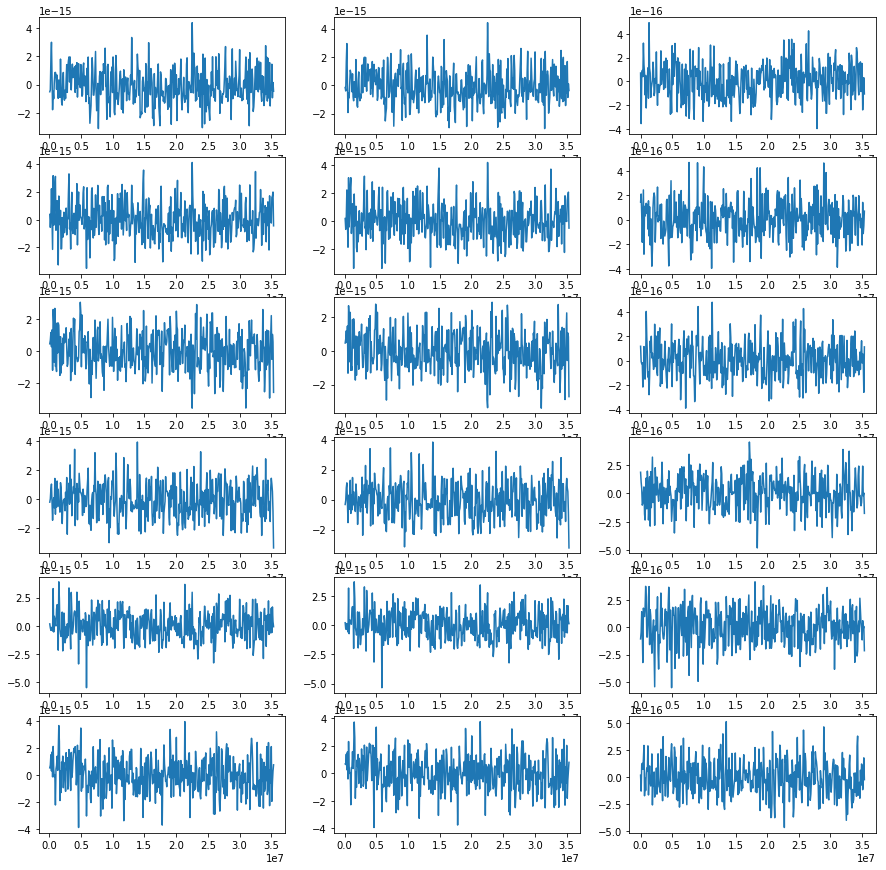

In [20]:
f,ax = plt.subplots(len(y_tot.keys()),3,figsize=(15,15))
for i in range(0,len(ax)):
    key = y_tot.keys()[i]
    ax[i,0].plot(t_tot[key],y_tot[key])
    ax[i,1].plot(t_tot[key],y_laser[key])
    ax[i,2].plot(t_tot[key],y_shot[key])
    
    
f.show()

In [21]:
def tdi_val(data,t_vec,y_all,z_all,y_all_include='all',side='l',generation=0,para='X',print_on=False,delay_on=True):
    
    #y=y_all['shot']
    #y={}
    #for sources in y_all.keys():
    #    if (sources in y_all_include) or (y_all_include=='all'):
    #        for keys in y_all[sources].keys():
    #            if keys not in y.keys():
    #                y[keys] = lambda time: y_all[sources][keys](time)
    #            else:
    #                y[keys] = lambda time: y[keys](time) +y_all[sorces][keys](time)
    
    if para=='X':
        shift = 0
        method='XYZ'
    elif para=='Y':
        shift = 1
        method='XYZ'
    elif para == 'Z':
        shift = 2
        method='XYZ'
    elif para=='alpha':
        shift = 0
        method='aby'
    elif para=='beta':
        shift = 1
        method='aby'
    elif para == 'gamma':
        shift = 2
        method='aby'
    elif para=='X1':
        shift = 0
        method='X1Y1Z1'
    elif para=='Y1':
        shift = 1
        method='X1Y1Z1'
    elif para == 'Z1':
        shift = 2
        method='X1Y1Z1'
    elif para=='P':
        shift = 0
        method='PQR'
    elif para=='Q':
        shift = 1
        method='PQR'
    elif para == 'R':
        shift = 2
        method='PQR'
    
    
    
    
    
    id={}
    for kk in range(-3,4):
        if kk!=0:
            sign = np.sign(kk)
            abs_kk = abs(kk) - 1
            
            id[str(kk)] = (((abs_kk+shift)%3)+1)*sign
    if print_on==True:
        print(id)
    
    def id_convert(s,r):
        return str(id[str(s)])+str(id[str(r)])
        
    X = []
    
    def obtain_tdi_aby(data,id,para,y,t):
        a=[]
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        a.append(y[id_convert(3,1)](t-t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        a.append(-y[id_convert(2,1)](t-t_del))
        
        t_del = delay(data,[id['2']],t,para=para,delay_on=delay_on)
        a.append(y[id_convert(2,3)](t-t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        a.append(-y[id_convert(3,2)](t-t_del))
        
        t_del = delay(data,[id['1'],id['2']],t,para=para,delay_on=delay_on)
        a.append(y[id_convert(1,2)](t-t_del))

        t_del = delay(data,[id['1'],id['3']],t,para=para,delay_on=delay_on)
        a.append(-y[id_convert(1,3)](t-t_del))

        a = np.array(a)
        
        return sum(np.real(a))
    
    def obtain_tdi_P(data,id,para,y,z,t):
        P = []
        
        
        t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(3,2)](t+t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(2,3)](t+t_del))
        
        t_del = delay(data,[id['1'],id['3']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(3,2)](t+t_del))
        
        t_del = delay(data,[id['-1'],id['-2']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(2,3)](t+t_del))
        
        t_del = delay(data,[id['3'],id['1'],id['-1']],t,para=para,delay_on=delay_on)
        P.append(y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['1'],id['-1']],t,para=para,delay_on=delay_on)
        P.append(-y[id_convert(1,2)](t+t_del))
        
        if z!=False:
            
            t_del = delay(data,[id['-2'],id['3']],t,para=para,delay_on=delay_on)
            P.append(0.5*z[id_convert(2,1)](t+t_del))
            
            t_del = delay(data,[id['-2'],id['3']],t,para=para,delay_on=delay_on)
            P.append(-0.5*z[id_convert(3,1)](t+t_del))
            
            t_del = delay(data,[id['1'],id['-1'],id['-2'],id['3']],t,para=para,delay_on=delay_on)
            P.append(-0.5*z[id_convert(2,1)](t+t_del))
            
            t_del = delay(data,[id['1'],id['-1'],id['-2'],id['3']],t,para=para,delay_on=delay_on)
            P.append(0.5*z[id_convert(3,1)](t+t_del))
            
            
            t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
            P.append(0.5*z[id_convert(3,2)](t+t_del))
            
            t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
            P.append(-0.5*z[id_convert(1,2)](t+t_del))
            
            t_del = delay(data,[id['1'],id['-1'],id['-2']],t,para=para,delay_on=delay_on)
            P.append(-0.5*z[id_convert(3,2)](t+t_del))
            
            t_del = delay(data,[id['1'],id['-1'],id['-2']],t,para=para,delay_on=delay_on)
            P.append(0.5*z[id_convert(1,2)](t+t_del))
            
            
            
            t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
            P.append(0.5*z[id_convert(1,3)](t+t_del))
            
            t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
            P.append(-0.5*z[id_convert(2,3)](t+t_del))
            
            t_del = delay(data,[id['1'],id['-1'],id['3']],t,para=para,delay_on=delay_on)
            P.append(-0.5*z[id_convert(1,3)](t+t_del))
            
            t_del = delay(data,[id['1'],id['-1'],id['3']],t,para=para,delay_on=delay_on)
            P.append(0.5*z[id_convert(2,3)](t+t_del))
        
        
        P = np.array(P)
        
        return sum(np.real(P))
        
        
        
    def obtain_tdi_X_adjusted(data,id,para,y,z,t):
        X=[]
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(2,1)](t+t_del))
        
        t_del = delay(data,[id['2'],id['-2'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[id['3'],id['-3'],id['-2'],id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(2,1)](t+t_del))
        
        t_del = delay(data,[id['3'],id['-3'],id['-2'],id['2'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[id['3'],id['-3'],id['3'],id['-3'],id['-2'],id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['3'],id['-3'],id['3'],id['-3'],id['-2'],id['2'],id['2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(2,1)](t+t_del))
        
        t_del = delay(data,[id['-3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['3'],id['-3'],id['2']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['2'],id['3'],id['-3'],id['2']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['2'],id['-2'],id['2'],id['2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(2,1)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['2'],id['-2'],id['2'],id['2'],id['3'],id['-3'],id['-3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,2)](t+t_del))
        
        if z!=False:
            t_del = delay(data,[],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['3'],id['-3']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['3'],id['-3']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['-2'],id['2']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['-2'],id['2']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['3'],id['-3'],id['3'],id['-3'],id['-2'],id['2']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['3'],id['-3'],id['3'],id['-3'],id['-2'],id['2']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['-2'],id['2'],id['-2'],id['2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['-2'],id['2'],id['-2'],id['2'],id['3'],id['-3']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['-2'],id['2'],id['3'],id['-3'],id['3'],id['-3'],id['-2'],id['2']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['-2'],id['2'],id['3'],id['-3'],id['3'],id['-3'],id['-2'],id['2']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(3,1)](t-t_del))

        X = np.array(X)
        
        return sum(np.real(X))
        
        
    def obtain_tdi(data,id,para,y,z,t):
        X=[]
        
        t_del = delay(data,[id['3'],id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(2,1)](t+t_del))
        
        t_del = delay(data,[id['-2']],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['-2'],id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,3)](t+t_del))
        
        t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(3,1)](t+t_del))
        
        t_del = delay(data,[id['3']],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(1,2)](t+t_del))
        
        t_del = delay(data,[],t,para=para,delay_on=delay_on)
        X.append(-y[id_convert(2,1)](t+t_del))
        
        
        if z!=False:
            t_del = delay(data,[id['2'],id['-2'],id['-3'],id['3']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['-3'],id['3'],id['2'],id['-2']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['2'],id['-2']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(2,1)](t-t_del))

            t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
            X.append(-0.5*z[id_convert(3,1)](t-t_del))

            t_del = delay(data,[id['-3'],id['3']],t,para=para,delay_on=delay_on)
            X.append(0.5*z[id_convert(2,1)](t-t_del))
    
        X = np.array(X)
        
        return sum(np.real(X))
    
    X_ret=[]
    t_ret=[]
    for t in t_vec:
        try:
            X = 0
            if y_all_include=='all':
                y_all_include = y_all.keys()
            for source in y_all_include:
                if method=='XYZ':
                    X = X + obtain_tdi(data,id,para,y_all[source],z_all[source],t)
                elif method=='aby':
                    X = X + obtain_tdi_aby(data,id,para,y_all[source],t)
                elif method=='X1Y1Z1':
                    X = X + obtain_tdi_X_adjusted(data,id,para,y_all[source],z_all[source],t)
                elif method=='PQR':
                    X = X + obtain_tdi_P(data,id,para,y_all[source],z_all[source],t)
            
            X_ret.append(X)
            t_ret.append(t)
            #print(X_ret[-1])
        except ValueError:
            #print "Unexpected error:", sys.exc_info()[0]
            #print(t)
            #raise ValueError('can not calculate at t='+str(t))
            pass
        
    return np.array(t_ret),np.array(X_ret)
    
    
    

In [22]:
y_list=['shot','laser']
y_all={}
z_all={}
y_all['shot'] = y_shotnoise
y_all['laser'] = y_lasernoise
z_all['laser'] = z_lasernoise
z_all['shot'] = False

In [23]:
def errorsolve(x,func):
    try:
        return func(x)
    except ValueError:
        return np.nan

In [24]:
tdi_all = {}
tdi_shot = {}
tdi_laser = {}
para = ['X','Y','Z','alpha','beta','gamma','X1','Y1','Z1','P','Q','R']

for i in range(0,len(para)):
    X_vec = []
    t_vec = []
    X_vec_s = []
    t_vec_s = []
    X_vec_l = []
    t_vec_l = []
    
    t,X_calc= tdi_val(data,data.t_plot[0],y_all,z_all,y_all_include=y_list,para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_all[para[i]] = [np.array(t),np.array(X_calc),func]
      
    t,X_calc= tdi_val(data,data.t_plot[0],y_all,z_all,y_all_include=['shot'],para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_shot[para[i]] = [np.array(t),np.array(X_calc),func]
       
    t,X_calc= tdi_val(data,data.t_plot[0],y_all,z_all,y_all_include=['laser'],para=para[i])
    func = lambda time: errorsolve(time,interp1d(t,X_calc,bounds_error=False))
    tdi_laser[para[i]] = [np.array(t),np.array(X_calc),func]        

/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in divide
/home/ester/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


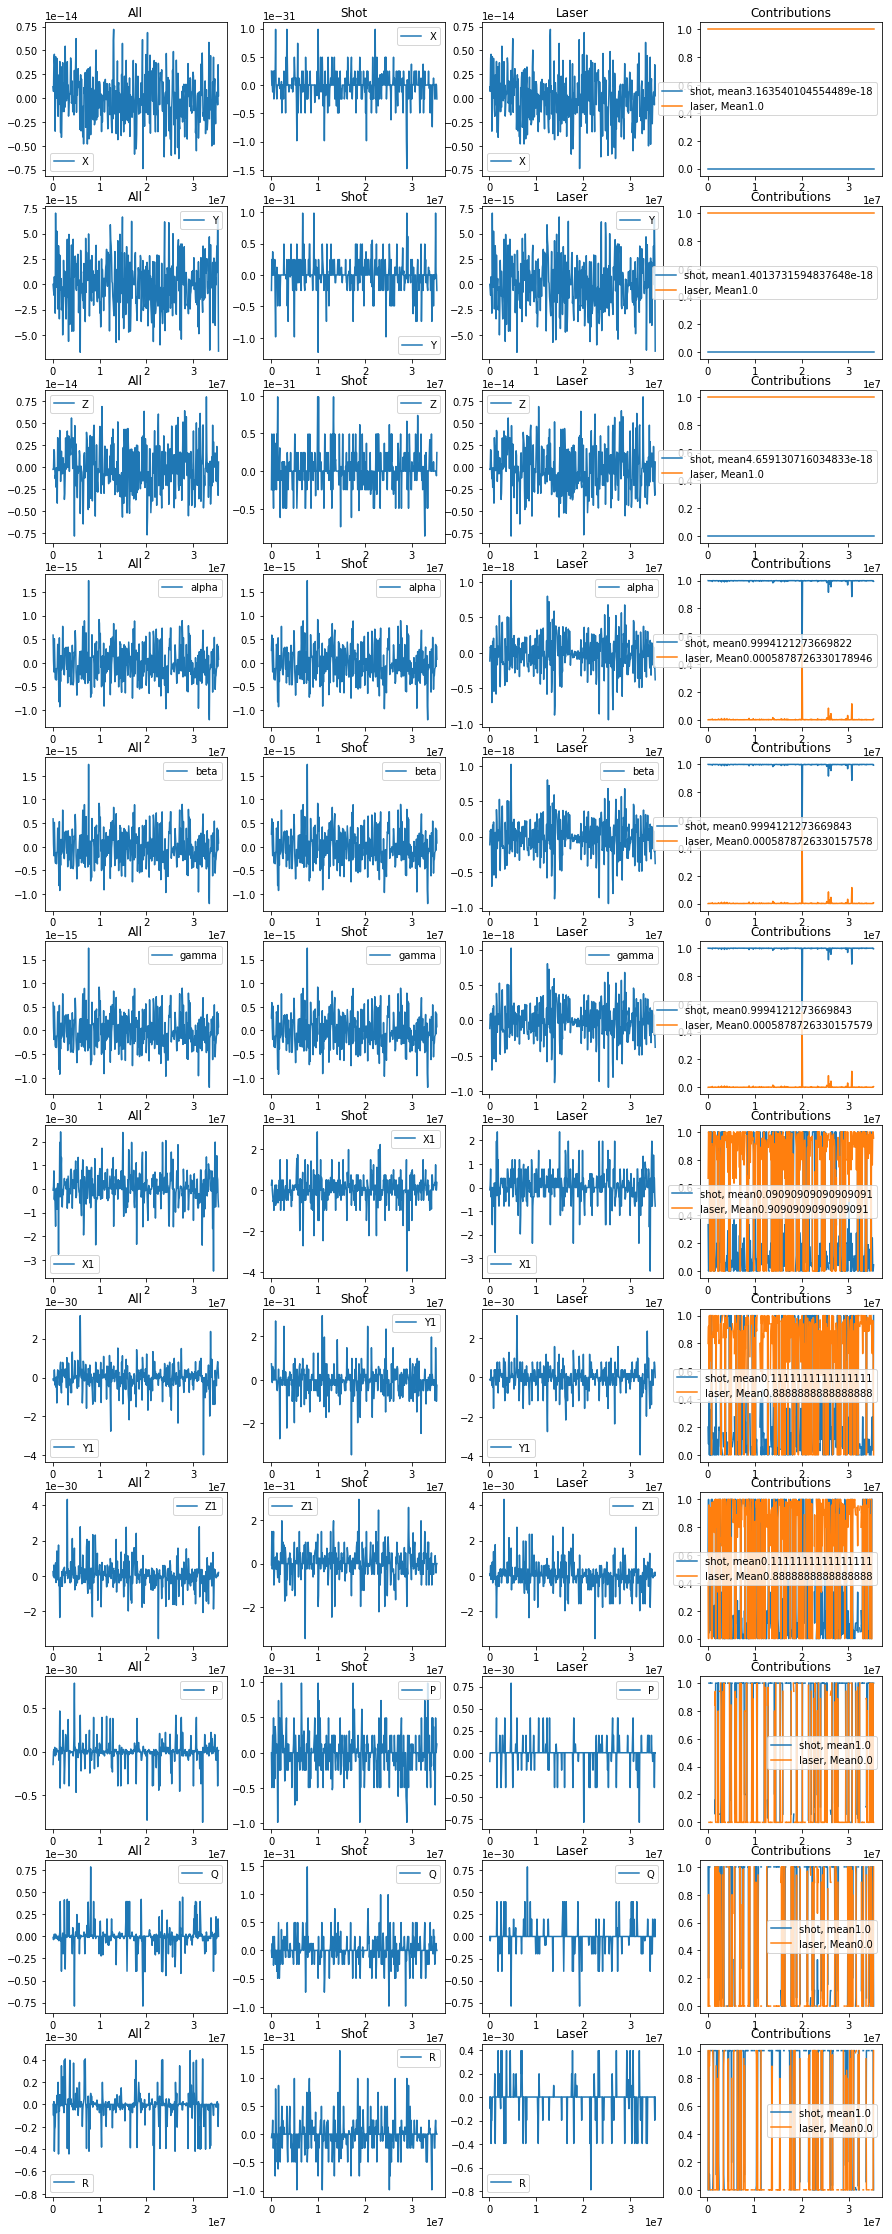

In [25]:
def mean(x):
    x_new = []
    for i in x:
        if np.isnan(i)== False:
            x_new.append(i)
    x_new=np.array(x_new)
    
    return [sum(x_new)/len(x_new),np.median(x_new)]

sorted_list = sorted(tdi_all.keys())
f,ax = plt.subplots(len(sorted_list),4,figsize=(15,40))
count=0



for keys in para:
    ax[count,0].set_title('All')
    ax[count,0].plot(tdi_all[keys][0],tdi_all[keys][1],label=keys)
    ax[count,0].legend(loc='best')
    ax[count,1].set_title('Shot')
    ax[count,1].plot(tdi_shot[keys][0],tdi_shot[keys][1],label=keys)
    ax[count,1].legend(loc='best')
    ax[count,2].set_title('Laser')
    ax[count,2].plot(tdi_laser[keys][0],tdi_laser[keys][1],label=keys)
    ax[count,2].legend(loc='best')
    
    y_plot1 = abs(tdi_shot[keys][1])/(abs(tdi_shot[keys][1])+abs(tdi_laser[keys][1]))
    y_plot2 = abs(tdi_laser[keys][1])/(abs(tdi_shot[keys][1])+abs(tdi_laser[keys][1]))
    ax[count,3].set_title('Contributions')
    ax[count,3].plot(tdi_all[keys][0],y_plot1,label ='shot, mean'+str(mean(y_plot1)[1]))
    ax[count,3].plot(tdi_all[keys][0],y_plot2,label='laser, Mean'+str(mean(y_plot2)[1]))
    #ax[count,3].plot(tdi_all[keys][0],y_plot1+y_plot2,label ='Total')
    ax[count,3].legend(loc='best')
    
    
    
    
    
    count=count+1
    

In [33]:
# Select PAA
t_vec = t
sc = 1
alpha=[]
for t in t_vec:
    alpha.append(data.PAA_func['l_out'](sc,t)*0.5)
alpha = np.array(alpha)

In [35]:
sigma_Dx = (1000e-6)/3.0
sigma_Dy = (50e-6)/3.0
Dx = []
Dy = []
delta_alpha = []
delta_Dx = []

angular_jitter=[]
long_jitter=[]
rot_long_jitter = []
OPD_PAAM = []

In [36]:
for i in range(0,len(alpha)):
    Dx.append(np.random.normal(loc=0,scale=sigma_Dx))
    Dy.append(np.random.normal(loc=0,scale=sigma_Dy))
    if i==0:
        delta_alpha.append(0)
        delta_Dx.append(0)
    else:
        delta_alpha.append(alpha[i] - alpha[i-1])
        delta_Dx.append(Dx[i]-Dx[i-1])

    angular_jitter.append((2**0.5)*(Dx[i]*alpha[i] +Dy[i])*delta_alpha[i])
    long_jitter.append((2**0.5)*(1+0.5*(alpha[i]**2))*delta_Dx[i])
    rot_long_jitter.append((2**0.5)*delta_alpha[i])
    
    OPD_PAAM.append((Dy[i]-Dx[i]*np.tan(alpha[i]))*(np.sin(alpha[i])/np.sin(np.radians(135)+alpha[i]))*(1-np.cos(np.radians(90) - 2*alpha[i])))



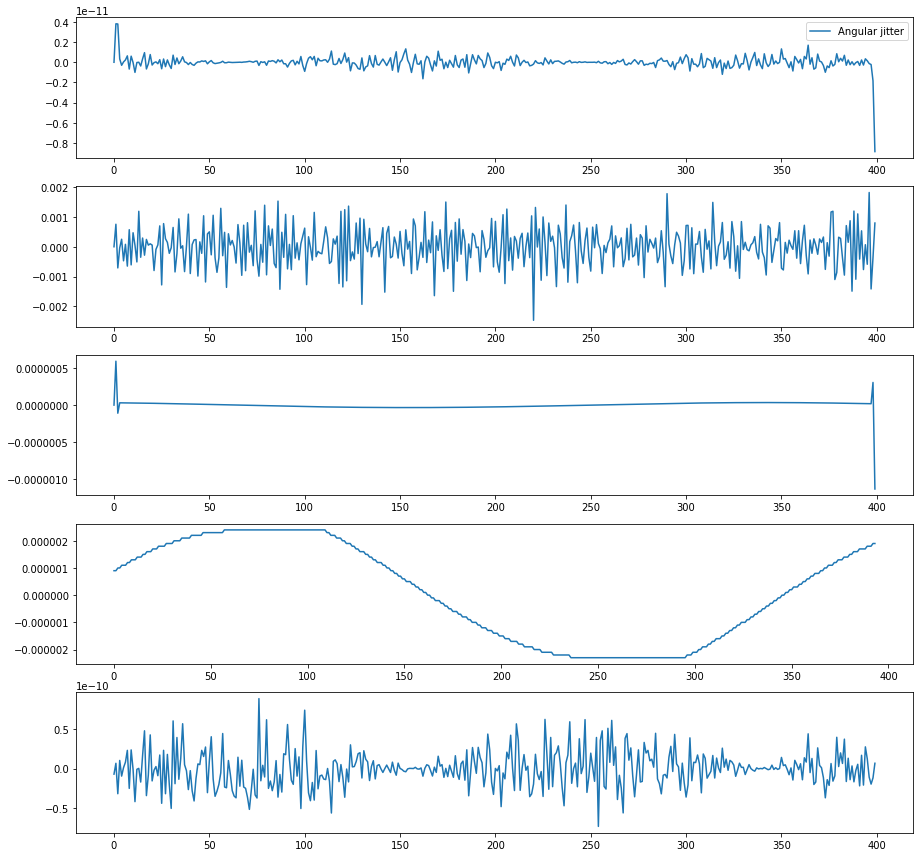

In [37]:
f,ax = plt.subplots(5,1,figsize=(15,15))
ax[0].plot(angular_jitter,label='Angular jitter')
ax[1].plot(long_jitter,label='Longitudinal jitter')
ax[2].plot(rot_long_jitter,label='Rotation longitudinal jitter')
ax[3].plot(PAA_part_set[0],label='PAA')
ax[4].plot(OPD_PAAM,label='OPD')
ax[0].legend(loc='best')

/home/ester/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


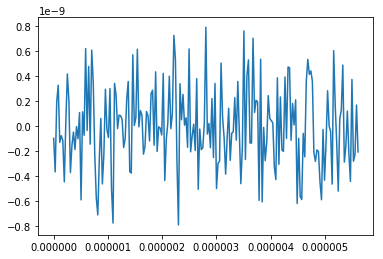

In [38]:
t = data.t_calc[0][data.offset:-data.offset]
N = len(OPD_PAAM)
T = t[1]-t[0]
xf = np.linspace(0,1.0/(2*T),N/2 +1)
OPD_FFT = np.fft.rfft(OPD_PAAM)
plt.plot(xf,OPD_FFT)

In [39]:
freq_lasernoise_PSD = lambda f: 40

In [41]:
N=4096
f0 = 1e-6
f_max = 1e-3
M = N/2 +1
df = (f_max-f0)/M
f_lin = np.linspace(f0,f_max,M)
psd_lin = freq_lasernoise_PSD(f_lin)
ASD=[]
phi = []
Z_neg = []
Z_pos = []
for f in f_lin:
    psd_ph = freq_lasernoise_PSD(f)*(f**2)
    ASD.append((psd_ph*2)**0.5)
    phi.append(random.random()*2*np.pi)
    Z_pos.append(ASD[-1]*np.exp(1j*phi[-1]))
    Z_neg.append(ASD[-1]*np.exp(1j*random.random()*2*np.pi))

Z1 = [0]*(N/2)
Z_tot=[0]
for i in range(0,len(Z_pos)):
    Z_tot.append(Z_pos[i])
for i in range(0,len(Z_neg)):
    Z_tot.append(Z_neg[i])
IFFT = np.fft.ifft(Z_tot)
Dt = 1/(2.0*f_max)
t0 = 0
t_max = (N-1)*Dt
t_IFFT = np.linspace(t0,t_max,len(IFFT))
laser_pn = np.real(IFFT)

In [43]:
N=4096
f0 = 1e-6
f_max = 1e-3
M = N/2 +1
df = (f_max-f0)/M
f_lin = np.linspace(f0,f_max,M)
psd_lin = freq_lasernoise_PSD(f_lin)
ASD=[]
phi = []
Z_neg = []
Z_pos = []
for f in f_lin:
    psd_ph = freq_lasernoise_PSD(f)
    ASD.append((psd_ph*2)**0.5)
    phi.append(random.random()*2*np.pi)
    Z_pos.append(ASD[-1]*np.exp(1j*phi[-1]))
    Z_neg.append(ASD[-1]*np.exp(1j*random.random()*2*np.pi))

Z1 = [0]*(N/2)
Z_tot=[0]
for i in range(0,len(Z_pos)):
    Z_tot.append(Z_pos[i])
for i in range(0,len(Z_neg)):
    Z_tot.append(Z_neg[i])
IFFT = np.fft.ifft(Z_tot)
Dt = 1/(2.0*f_max)
t0 = 0
t_max = (N-1)*Dt
t_IFFT = np.linspace(t0,t_max,len(IFFT))
laser_fn = np.real(IFFT)

In [44]:
PAAM_pn_1 = np.array(OPD_PAAM)/np.array(labda)
PAAM_pn_2 = np.array(OPD_PAAM)/np.array(c/((c/labda)+laser_fn[0:len(OPD_PAAM)])) # Corrected for frequency noise laser

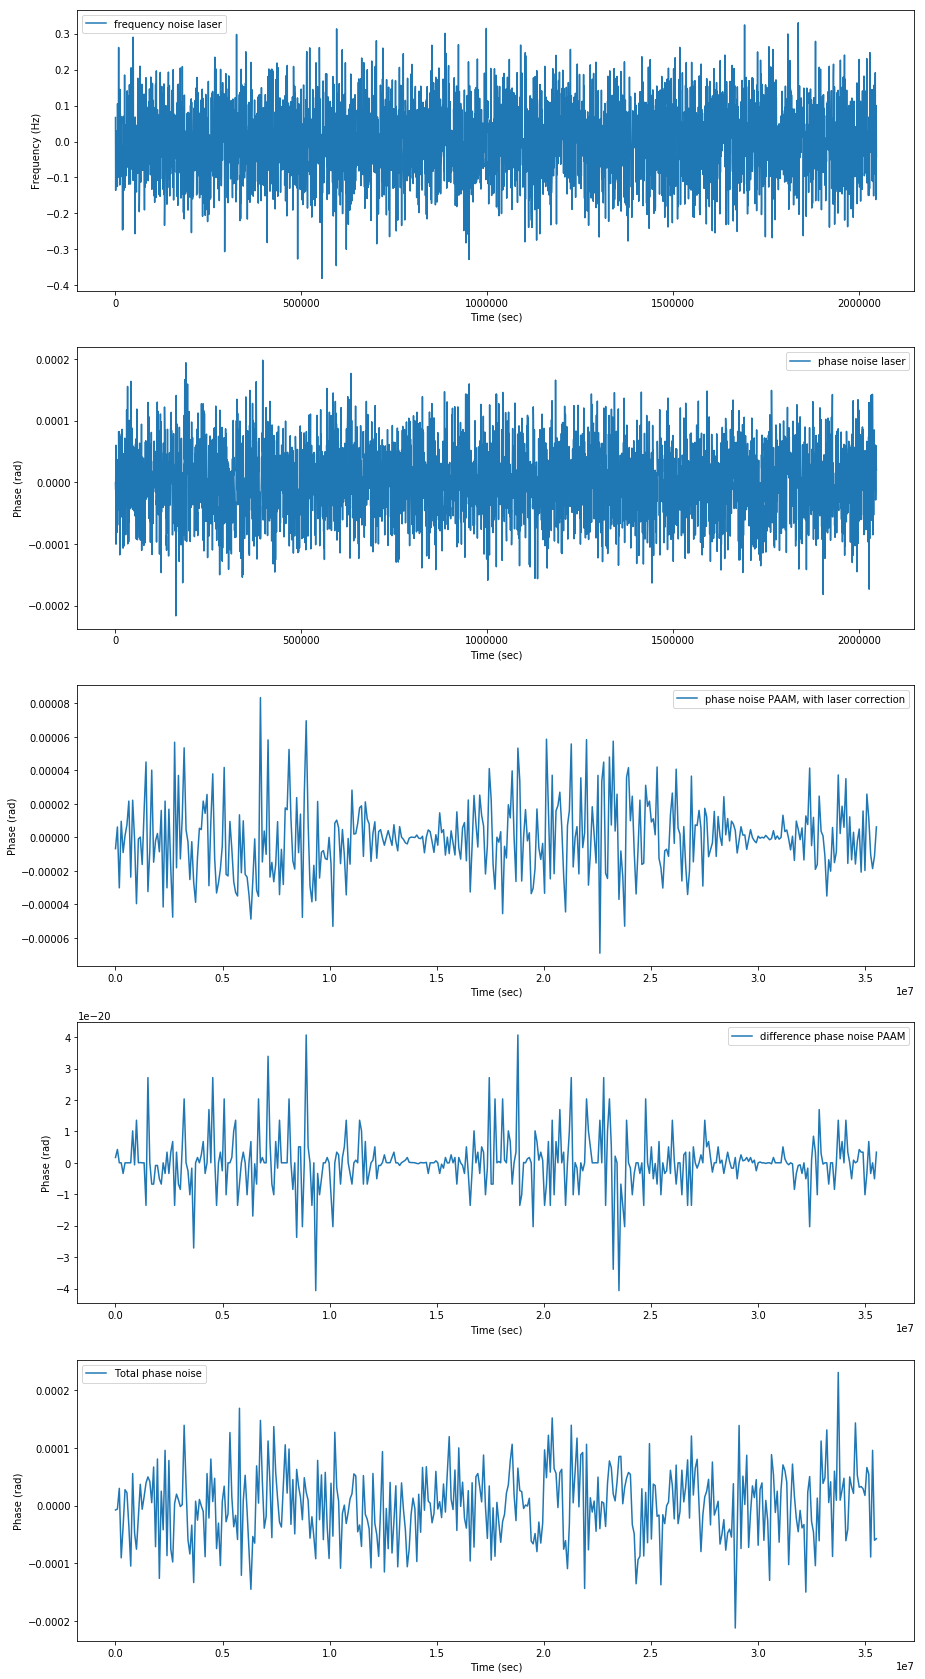

In [48]:
f,ax = plt.subplots(5,1,figsize=(15,30))
ax[0].plot(t_IFFT,laser_fn,label='frequency noise laser')
ax[0].set_ylabel('Frequency (Hz)')
ax[1].plot(t_IFFT,laser_pn,label='phase noise laser')
ax[1].set_ylabel('Phase (rad)')
ax[2].plot(data.t_calc[0],PAAM_pn_2,label='phase noise PAAM, with laser correction')
ax[2].set_ylabel('Phase (rad)')
ax[3].plot(data.t_calc[0],PAAM_pn_1 - PAAM_pn_2,label='difference phase noise PAAM')
ax[3].set_ylabel('Phase (rad)')
ax[4].plot(data.t_calc[0],PAAM_pn_2+laser_pn[:len(PAAM_pn_2)],label='Total phase noise')
ax[4].set_ylabel('Phase (rad)')



for j in ax:
    j.legend(loc='best')
    j.set_xlabel('Time (sec)')
f.show()

In [56]:
PAAM_pn_2 #...Ga hier verder

array([-6.69946803e-06,  6.23579319e-06, -3.00860605e-05,  9.64888360e-06,
       -9.03627855e-06,  1.06319048e-06,  7.56809053e-06,  2.16881079e-05,
       -2.37035701e-05,  2.22327984e-05, -9.30234375e-07, -3.95319083e-05,
       -9.08140086e-07,  1.74978265e-07, -1.61449275e-05,  1.56257284e-05,
        4.50273681e-05, -3.23284910e-05, -7.94975918e-06,  4.01432690e-05,
       -1.47835755e-05, -2.00815865e-06,  2.34058923e-06, -8.56052050e-06,
        1.61235351e-05, -4.15236758e-05,  2.17100372e-05, -3.00691493e-05,
        1.68551760e-05, -1.91252667e-05, -4.75907248e-05,  5.68377907e-05,
       -1.81105846e-05,  3.70026017e-05, -1.28220100e-05,  1.19003671e-05,
        5.34649273e-05,  4.55892713e-06, -2.66878356e-06, -2.51391041e-05,
       -2.52430970e-06, -2.67504284e-05, -3.87188871e-05, -1.18020891e-05,
        5.48628999e-06,  4.66591958e-06,  2.17014950e-05,  1.43810270e-05,
        2.56613760e-05, -2.88008570e-05,  9.32715595e-06,  3.79326422e-05,
       -1.25329997e-05, -

In [49]:
def PSD(f_list,SD_list):
    return interp1d(f_list,SD_list)

def PowerLaw(SD_val,f0,exp=1):
    return lambda f: (SD_val)*((f/f0)**exp)

def add_func_help(func_list,f):

    func_ret = func_list[0]

    if len(func_list)>1:
        for i in range(1,len(func_list)):
            func_ret = func_ret(f)+func_list[i](f)

    return func_ret

def add_func(func_list):

    return lambda f: add_func_help(func_list,f)


def Noise(f0,f_max,N,psd,unit):
    M = N/2.0 +1
    df = (f_max-f0)/M

    f_lin = np.linspace(f0,f_max,M)
    psd_lin = psd(f_lin)

    ASD=[]
    phi = []
    Z_neg = []
    Z_pos = []
    for f in f_lin:
        if unit =='phasepercycle':
            ASD.append((((psd(f)**2)*2*np.pi)*2)**0.5)
        else:
            ASD.append((psd(f)*2)**0.5)
        phi.append(random.random()*2*np.pi)
        Z_pos.append(ASD[-1]*np.exp(1j*phi[-1]))
        Z_neg.append(ASD[-1]*np.exp(1j*random.random()*2*np.pi))


    Z1 = [0]*(N/2)
    Z_tot=[0]
    for i in range(0,len(Z_pos)):
        Z_tot.append(Z_pos[i])
    for i in range(0,len(Z_neg)):
        Z_tot.append(Z_neg[i])

    IFFT = np.fft.ifft(Z_tot)
    Dt = 1/(2.0*f_max)
    t0 = 0
    t_max = (N-1)*Dt
    t_IFFT = np.linspace(t0,t_max,len(IFFT))

    return [t_IFFT,IFFT]

def Noise_time(f0,f_max,N,psd,t_stop,unit='freq'):
    t_max = 0
    count=0
    while t_max< t_stop:
        #print(count)
        [t_IFFT,IFFT] = Noise(f0,f_max,N,psd,unit=unit)
        if count!=0:
            t_tot = np.concatenate((t_tot,t_IFFT+t_tot[-1]))
            noise_tot = np.concatenate((noise_tot,IFFT))
        elif count==0:
            t_tot = t_IFFT
            noise_tot = IFFT
        t_max = t_tot[-1]
        print(t_max)
        count=count+1

    t_ret = []
    noise_ret = []
    for i in range(0,len(t_tot)):
        if t_tot[i]<=t_stop:
            t_ret.append(t_tot[i])
            noise_ret.append(noise_tot[i])
    t_ret = np.array(t_ret)
    noise_ret = np.array(noise_ret)

    func_noise = interp1d(t_ret,noise_ret)

    return [t_ret,noise_ret],func_noise
